In [70]:
import pandas as pd
import numpy as np

In [71]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [73]:
df = pd.read_csv('trainx.csv')

In [74]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [75]:
df.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [76]:
df = df.drop(df[df.Views > 3000000].index)


In [77]:
import seaborn as sns

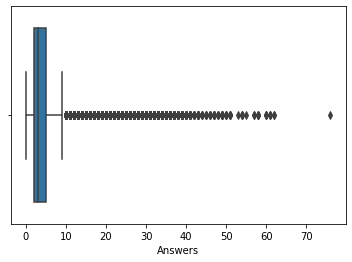

In [78]:
sns.boxplot(df['Answers'])

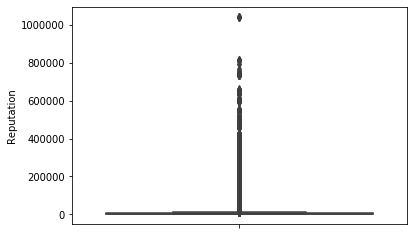

In [79]:
sns.boxplot(y=df['Reputation'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330032 entries, 0 to 330044
Data columns (total 7 columns):
ID            330032 non-null int64
Tag           330032 non-null object
Reputation    330032 non-null float64
Answers       330032 non-null float64
Username      330032 non-null int64
Views         330032 non-null float64
Upvotes       330032 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ MB


In [81]:
le = LabelEncoder()
df['Tag'] = le.fit_transform(df['Tag'])


In [82]:
df.drop(['ID','Username'], axis=1,inplace =True)
target = df['Upvotes']

In [83]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=7)
fxb = bn.transform([df['Answers']])[0]
df['fxb'] = fxb

In [84]:
feature_names = [x for x in df.columns if x not in ['Upvotes']]


In [85]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df[feature_names], target,test_size = 0.22,random_state =205)


In [86]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_val = sc_X.transform(x_val)

In [87]:
poly_reg = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.021,max_iter=100)
lin_reg_1.fit(X_poly, y_train)

LassoLars(alpha=0.021, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=100, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [88]:

from sklearn.metrics import r2_score

In [89]:
pred_val = lin_reg_1.predict(poly_reg.fit_transform(x_val))

print(r2_score(y_val, pred_val))

0.9034378793327891


In [90]:
dfx = pd.read_csv('testx.csv')


In [91]:
ids = dfx['ID']
dfx.drop(['ID','Username'], axis=1,inplace =True)


In [92]:
le = LabelEncoder()
dfx['Tag'] = le.fit_transform(dfx['Tag'])

In [93]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=7)
fxc = bn.transform([dfx['Answers']])[0]
dfx['pd_watched'] = fxc

In [ ]:
test = sc_X.fit_transform(dfx)
pred_test = lin_reg_1.predict(poly_reg.fit_transform(test))
pred_test=abs(pred_test)

In [ ]:
submission = pd.DataFrame({'ID': ids,'Upvotes':pred_test})
submission.to_csv("final_sub08.csv",index=False)